# Deskripsi Data dan File

**Penjelasan Dataset**

--------------------------------------------------------------------------------

Dataset ini berisi mengenai informasi struktur arsitektur dari berbagai CPU dan GPU yang ada di dunia. Dataset ini digunakan untuk mengetahui bagaimana perkembangan struktur arsitektur CPU dan GPU dari waktu ke waktu. Melalui dataset ini juga bisa diketahui foundry apa saja yang digunakan oleh suatu vendor CPU/GPU untuk memproduksi product mereka. Data set ini diambil dari website [kaggle](https://www.kaggle.com/datasets/michaelbryantds/cpu-and-gpu-product-data)

**Loading Data dan Import Modul yang Diperlukan**

--------------------------------------------------------------------------------

Pada proses ini dilakukan rename nama sebuah kolom karena terdapat kesalahan nama dari file dataset bawaannya. Terdapat juga satu kolom yang diubah tipe datanya agar lebih sesuai dan mudah untuk digunakan dalam proses analisa.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

df = pd.read_csv("chip_dataset.csv")
df.rename(columns = {'Unnamed: 0':'Index'}, inplace = True)
df["Release Date"] = pd.to_datetime(df["Release Date"])

**Informasi Dataset**

--------------------------------------------------------------------------------

In [2]:
banyak_baris = len(df)
banyak_kolom = len(df.columns)

print(f"Format file dataset adalah {os.path.splitext('chip_dataset.csv')[1]}")
print(f"Ukuran file dataset adalah {os.stat('chip_dataset.csv').st_size} Bytes")
print(f"Dimensi dataset adalah {banyak_baris} baris x {banyak_kolom} kolom")

Format file dataset adalah .csv
Ukuran file dataset adalah 420326 Bytes
Dimensi dataset adalah 4854 baris x 14 kolom


# Karakteristik Data

**Macam Atribut pada Dataset**

--------------------------------------------------------------------------------

In [3]:
kolom = df.columns

print(f"Terdapat {len(kolom)} kolom/atribut pada dataset ini, {len(kolom)} atribut tersebut antara lain: ")
for i in range (len(kolom)):
    jenis_attribut = ""
    if df[kolom[i]].dtypes == "int64" or df[kolom[i]].dtypes == "float64": jenis_attribut = "Kuantitatif"
    elif df[kolom[i]].dtypes == "object" :
        jenis_attribut = "Kategorikal"
        if len(list(df[kolom[i]].unique())) == 2: jenis_attribut += " Binary"
        elif len(list(df[kolom[i]].unique())) > 2: jenis_attribut += " Nominal"
    elif df[kolom[i]].dtypes == "datetime64[ns]": jenis_attribut = "Waktu"
    print(f"{i+1}. {kolom[i]}, jenis attribut = {jenis_attribut}")

Terdapat 14 kolom/atribut pada dataset ini, 14 atribut tersebut antara lain: 
1. Index, jenis attribut = Kuantitatif
2. Product, jenis attribut = Kategorikal Nominal
3. Type, jenis attribut = Kategorikal Binary
4. Release Date, jenis attribut = Waktu
5. Process Size (nm), jenis attribut = Kuantitatif
6. TDP (W), jenis attribut = Kuantitatif
7. Die Size (mm^2), jenis attribut = Kuantitatif
8. Transistors (million), jenis attribut = Kuantitatif
9. Freq (MHz), jenis attribut = Kuantitatif
10. Foundry, jenis attribut = Kategorikal Nominal
11. Vendor, jenis attribut = Kategorikal Nominal
12. FP16 GFLOPS, jenis attribut = Kuantitatif
13. FP32 GFLOPS, jenis attribut = Kuantitatif
14. FP64 GFLOPS, jenis attribut = Kuantitatif


**Makna Tiap Atribut**

-------------------------------------------------------------------------------

1. Index, atribut ini merupakan id/tanda pengenal unik untuk setiap product yang ada pada dataset
2. Product, atribut ini berisi nama dari product
3. Type, atribut ini berisi tipe dari product, CPU atau GPU
4. Release Date, atribut ini merupakan tanggal rilis pertama kali product ke publik
5. Process Size (nm), process size merupakan ukuran dari satu transistor pada CPU atau GPU
6. TDP (W), TDP adalah daya maksimum yang dapat digunakan oleh product
7. Die Size (mm^2), Die Size adalah ukuran luas dari lempengan microprocessor dalam CPU/GPU
8. Transistors (million), banyak transistor pada suatu CPU/GPU
9. Freq (MHz), Frekuensi merupakan kecepatan clock sebuah processor untuk mengerjakan perintah program dalam satu detik
10. Foundry, foundry merupakan perusahaan pembuatan/pemroduksi CPU/GPU 
11. Vendor, vendor ini bisa disebut juga brand dari product, perusahaan vendor biasanya akan bekerja sama dengan perusahaan foundry untuk membuat productnya, perusahaan vendor akan membuat rancangan productnya (CPU/GPU) dan perusahaan foundry akan memproduksinya
12. FP16 GFLOPS, GFLOPS adalah ukuran kecepatan komputer yang berarti satu miliar operasi floating point per detik, FP16 berarti half precision
13. FP32 GFLOPS, GFLOPS adalah ukuran kecepatan komputer yang berarti satu miliar operasi floating point per detik, FP32 berarti single precision
14. FP64 GFLOPS, GFLOPS adalah ukuran kecepatan komputer yang berarti satu miliar operasi floating point per detik, FP64 berarti double precision

**Karakteristik Data Tiap Atribut**

--------------------------------------------------------------------------------

In [4]:
banyak_data_kosong = df.isnull().sum()
banyak_data = len(df)

print(f"1.  Index: ")
print(f"    Index adalah id unik (tidak ada yang sama) untuk setiap produk")
print(f"    Banyak data kosong: {banyak_data_kosong['Index']}")
print(f"    Presentase data kosong: {(banyak_data_kosong['Index']/banyak_data) * 100} %")

print(f"2.  Product: ")
print(f"    Kolom product berisi nama dari CPU atau GPU yang berarti unik dan tidak ada yang sama")
print(f"    Banyak data kosong: {banyak_data_kosong['Product']}")
print(f"    Presentase data kosong: {(banyak_data_kosong['Product']/banyak_data) * 100} %")

macam_type = list(df["Type"].unique())
print(f"3.  Type: ")
print(f"    Kolom Type bertipe data kategorikal dengan {len(macam_type)} macam data yaitu {', '.join(macam_type)}")
print(f"    Banyak data kosong: {banyak_data_kosong['Type']}")
print(f"    Presentase data kosong: {(banyak_data_kosong['Type']/banyak_data) * 100} %")

print(f"4.  Release Date: ")
print(f"    Kolom Release Date ini bertipe data waktu (timestamp) dengan format YYYY-MM-DD (Tahun-Bulan-Tanggal)")
print(f"    Rentang waktu: {df['Release Date'].min().strftime('%Y-%m-%d')} - {df['Release Date'].max().strftime('%Y-%m-%d')}")
print(f"    Banyak data kosong: {banyak_data_kosong['Release Date']}")
print(f"    Presentase data kosong: {(banyak_data_kosong['Release Date']/banyak_data) * 100} %")

print(f"5.  Process Size: ")
print(f"    Range data: {df['Process Size (nm)'].min()} - {df['Process Size (nm)'].max()}")
print(f"    Banyak data kosong: {banyak_data_kosong['Process Size (nm)']}")
print(f"    Presentase data kosong: {(banyak_data_kosong['Process Size (nm)']/banyak_data) * 100} %")

print(f"6.  TDP: ")
print(f"    Range data: {df['TDP (W)'].min()} - {df['TDP (W)'].max()}")
print(f"    Banyak data kosong: {banyak_data_kosong['TDP (W)']}")
print(f"    Presentase data kosong: {(banyak_data_kosong['TDP (W)']/banyak_data) * 100} %")

print(f"7.  Die Size: ")
print(f"    Range data: {df['Die Size (mm^2)'].min()} - {df['Die Size (mm^2)'].max()}")
print(f"    Banyak data kosong: {banyak_data_kosong['Die Size (mm^2)']}")
print(f"    Presentase data kosong: {(banyak_data_kosong['Die Size (mm^2)']/banyak_data) * 100} %")

print(f"8.  Transistors: ")
print(f"    Range data: {df['Transistors (million)'].min()} - {df['Transistors (million)'].max()}")
print(f"    Banyak data kosong: {banyak_data_kosong['Transistors (million)']}")
print(f"    Presentase data kosong: {(banyak_data_kosong['Transistors (million)']/banyak_data) * 100} %")

print(f"9.  Freq: ")
print(f"    Range data: {df['Freq (MHz)'].min()} - {df['Freq (MHz)'].max()}")
print(f"    Banyak data kosong: {banyak_data_kosong['Freq (MHz)']}")
print(f"    Presentase data kosong: {(banyak_data_kosong['Freq (MHz)']/banyak_data) * 100} %")

macam_foundry = list(df["Foundry"].unique())
print(f"10. Foundry: ")
print(f"    Kolom Foundry bertipe data kategorikal dengan {len(macam_foundry)} macam data yaitu {', '.join(macam_foundry)}")
print(f"    Banyak data kosong: {banyak_data_kosong['Foundry']}")
print(f"    Presentase data kosong: {(banyak_data_kosong['Foundry']/banyak_data) * 100} %")

macam_vendor = list(df["Vendor"].unique())
print(f"11. Vendor: ")
print(f"    Kolom Vendor bertipe data kategorikal dengan {len(macam_vendor)} macam data yaitu {', '.join(macam_vendor)}")
print(f"    Banyak data kosong: {banyak_data_kosong['Vendor']}")
print(f"    Presentase data kosong: {(banyak_data_kosong['Vendor']/banyak_data) * 100} %")

print(f"12. FP16 GFLOPS: ")
print(f"    Range data: {df['FP16 GFLOPS'].min()} - {df['FP16 GFLOPS'].max()}")
print(f"    Banyak data kosong: {banyak_data_kosong['FP16 GFLOPS']}")
print(f"    Presentase data kosong: {(banyak_data_kosong['FP16 GFLOPS']/banyak_data) * 100} %")

print(f"13. FP32 GFLOPS: ")
print(f"    Range data: {df['FP32 GFLOPS'].min()} - {df['FP32 GFLOPS'].max()}")
print(f"    Banyak data kosong: {banyak_data_kosong['FP32 GFLOPS']}")
print(f"    Presentase data kosong: {(banyak_data_kosong['FP32 GFLOPS']/banyak_data) * 100} %")

print(f"14. FP64 GFLOPS: ")
print(f"    Range data: {df['FP64 GFLOPS'].min()} - {df['FP64 GFLOPS'].max()}")
print(f"    Banyak data kosong: {banyak_data_kosong['FP64 GFLOPS']}")
print(f"    Presentase data kosong: {(banyak_data_kosong['FP64 GFLOPS']/banyak_data) * 100} %")

1.  Index: 
    Index adalah id unik (tidak ada yang sama) untuk setiap produk
    Banyak data kosong: 0
    Presentase data kosong: 0.0 %
2.  Product: 
    Kolom product berisi nama dari CPU atau GPU yang berarti unik dan tidak ada yang sama
    Banyak data kosong: 0
    Presentase data kosong: 0.0 %
3.  Type: 
    Kolom Type bertipe data kategorikal dengan 2 macam data yaitu CPU, GPU
    Banyak data kosong: 0
    Presentase data kosong: 0.0 %
4.  Release Date: 
    Kolom Release Date ini bertipe data waktu (timestamp) dengan format YYYY-MM-DD (Tahun-Bulan-Tanggal)
    Rentang waktu: 2000-01-01 - 2021-04-13
    Banyak data kosong: 75
    Presentase data kosong: 1.5451174289245984 %
5.  Process Size: 
    Range data: 0.0 - 250.0
    Banyak data kosong: 9
    Presentase data kosong: 0.1854140914709518 %
6.  TDP: 
    Range data: 1.0 - 900.0
    Banyak data kosong: 626
    Presentase data kosong: 12.896580140090647 %
7.  Die Size: 
    Range data: 1.0 - 826.0
    Banyak data kosong: 715


# Data Cleansing

**Pengecekan Data Tidak Valid**

--------------------------------------------------------------------------------

Data tidak valid disini maksudnya adalah data kuantitatif yang bernilai negatif. Informasi mengenai arsitektur CPU/GPU yang terdapat pada dataset tidak seharunya bernilai negatif dan pasti bernilai positif.

In [5]:
banyak_data_tidak_valid = df.loc[(df["TDP (W)"] < 0) | (df["Die Size (mm^2)"] < 0) | (df["Transistors (million)"] < 0) | (df["FP16 GFLOPS"] < 0) | (df["FP32 GFLOPS"] < 0) | (df["FP64 GFLOPS"] < 0)]

print(f"Banyak data tidak valid adalah {len(banyak_data_tidak_valid)}")

Banyak data tidak valid adalah 0


Karena data tidak valid adalah 0 maka tidak perlu dilakukan cleansing data untuk data tidak valid.

**Cleansing Data Kosong**

--------------------------------------------------------------------------------

- Pengecekan data kosong dan banyak/presentase data kosong untuk tiap atribut sudah dilakukan di bagian karakteristik. Melalui bagian karateristik kita mengetahui terdapat beberapa data yang kosong dan kami berniat menghapusnya. Data kosong terdapat pada atribut Release Date, Process Size, Die Size, TDP, Transistors, FP16 GFLOPS, FP32 GFLOPS, dan FP64 GFLOPS. Kami memilih menghapus data yang kosong agar proses analisa data dapat berjalan dengan lancar dan tidak terjadi hal-hal yang tidak diinginkan. Presentase data kosong juga tidak terlalu banyak (tidak termasuk atribut ke 12 hingga ke 14) sehingga jika dihapus hasil analisa datanya masih bisa mewakili keseluruhan data.
- Untuk atribut ke 12 hingga 14 presentase data kosongnya sangat besar melebihi 50% data yang ada, oleh sebab itu kami memilih untuk tidak menggunakan atribut ke 12 hingga 14 pada analisis ini dan akan menghapus atribut ke 12 hingga ke 14. Kami memilih menghapusnya karena jikalau data ini dipakai maka hasil analisanya tidak akan bisa mewakili keseluruhan data. 

In [6]:


df.drop(["FP64 GFLOPS", "FP32 GFLOPS", "FP16 GFLOPS"], inplace=True, axis=1)

df = df.loc[(df["Process Size (nm)"].notnull()) & (df["TDP (W)"].notnull()) & (df["Die Size (mm^2)"].notnull()) & (df["Transistors (million)"].notnull()) & (df["Release Date"].notnull())]

print(f"Dimensi dataset setelah dilakukan cleansing data kosong adalah {len(df)} baris x {len(df.columns)} kolom")


Dimensi dataset setelah dilakukan cleansing data kosong adalah 3367 baris x 11 kolom


# Statistik

**Sampel Data**

--------------------------------------------------------------------------------

Berikut adalah sampel data berupa data 10 products (CPU/GPU) dengan jumlah transistor terbanyak

In [7]:
sample = df.sort_values(["Transistors (million)"], ascending=False)

print(sample[:10].to_string(index=False))

 Index                   Product Type Release Date  Process Size (nm)  TDP (W)  Die Size (mm^2)  Transistors (million)  Freq (MHz) Foundry Vendor
  3134    NVIDIA A100 SXM4 40 GB  GPU   2020-05-14                7.0    400.0            826.0                54200.0      1095.0    TSMC NVIDIA
  3156         NVIDIA GRID A100B  GPU   2020-05-14                7.0    400.0            826.0                54200.0       900.0    TSMC NVIDIA
  3911          NVIDIA A100 PCIe  GPU   2020-06-22                7.0    250.0            826.0                54200.0       765.0    TSMC NVIDIA
  2674    NVIDIA A100 SXM4 80 GB  GPU   2020-11-16                7.0    400.0            826.0                54200.0      1095.0    TSMC NVIDIA
  2942         NVIDIA GRID A100A  GPU   2020-05-14                7.0    400.0            826.0                54200.0       900.0    TSMC NVIDIA
  4450           NVIDIA A30 PCIe  GPU   2021-04-12                7.0    165.0            826.0                54200.0      

**Statistik Data Tiap Atribut**

--------------------------------------------------------------------------------

In [8]:
kolom1 = ["Process Size (nm)", "TDP (W)", "Die Size (mm^2)", "Transistors (million)", "Freq (MHz)"]
index = ["Rata-rata", "Standar Deviasi", "Percentile 10%", "Percentile 25%", "Percentile 50%", "Percentile 75%", "Percentile 90%", "Nilai Maksimum", "Nilai Minimum"]


data1 = []
for attr in kolom1:
    rata2 = df[attr].mean()
    standar_deviasi = df[attr].std()
    percentile10 = df[attr].quantile(0.1)
    percentile25 = df[attr].quantile(0.25)
    median = df[attr].median()
    percentile75 = df[attr].quantile(0.75)
    percentile90 = df[attr].quantile(0.9)
    min = df[attr].min()
    max = df[attr].max()
    data1.append([rata2, standar_deviasi, percentile10, percentile25, median, percentile75, percentile90, max, min])
    
data2 = [[0.0 for i in range(len(data1))] for j in range(len(data1[0]))]
for i in range(len(data1)):
    for j in range(len(data1[i])):
        data2[j][i] = data1[i][j]
        
tabel = pd.DataFrame(data2, index, kolom1)

print("=====================================================================================================")
print("TABEL STATISTIK")
print("=====================================================================================================")
print(tabel.to_string())

TABEL STATISTIK
                 Process Size (nm)     TDP (W)  Die Size (mm^2)  Transistors (million)   Freq (MHz)
Rata-rata                52.746362   83.031779       198.843184            2126.138105  1521.046035
Standar Deviasi          40.178425   77.513807       129.434892            4278.517429  1014.459089
Percentile 10%           14.000000   17.000000        79.000000             105.000000   478.000000
Percentile 25%           28.000000   35.000000       110.000000             224.500000   650.000000
Percentile 50%           40.000000   65.000000       160.000000             731.000000  1133.000000
Percentile 75%           65.000000  100.000000       246.000000            1975.000000  2400.000000
Percentile 90%          130.000000  175.000000       350.000000            5000.000000  3100.000000
Nilai Maksimum          250.000000  900.000000       826.000000           54200.000000  4700.000000
Nilai Minimum             7.000000    1.000000         1.000000              10.0000

**Informasi yang didapat:**
- Jumlah seluruh data frekuensi dibagi banyak data frekuensi memiliki nilai paling besar di antara rata-rata atribut data lainnya.

- Standard deviasi atau central tendency berkaitan dengan jarak antara suatu data dengan nilai rata-rata data. Besar jarak antara data process size dengan rata-rata-nya paling kecil dibandingkan jarak data atribut lain dengan rata-rata masing-masing data atribut.

- Persentile 10% menunjukkan nilai data ke 0.1 dari keseluruhan data masing-masing atribut.
<br>Persentil 25% menunjukkan nilai data ke 1/4 dari keseluruhan data jumlah masing-masing atribut.
<br>Persentil 50% menunjukkan nilai data tengah dari keseluruhan data jumlah masing-masing atribut.
<br>Persentil 75% menunjukkan nilai data ke 3/4 dari keseluruhan data jumlah masing-masing atribut.
<br>Persentil 90% menunjukkan nilai data ke 0.9 dari keseluruhan data jumlah masing-masing atribut.

- Nilai terbesar dari range data transistors memiliki nilai yang paling besar dari nilai maksimum data lainnya.

- Nilai terkecil dari range data TDP dan Size sama-sama memiliki nilai paling kecil dibanding nilai minimum data lainnya.

In [9]:
print("\n=====================================================================================================")
print("TABEL FREKUENSI DATA KATEGORIKAL")
print("=====================================================================================================")
tabel_type = df["Type"].value_counts().reset_index()
tabel_type.columns = ["Type", "Frekuensi"]
tabel_foundry = df["Foundry"].value_counts().reset_index()
tabel_foundry.columns = ["Foundry", "Frekuensi"]
tabel_vendor = df["Vendor"].value_counts().reset_index()
tabel_vendor.columns = ["Vendor", "Frekuensi"]
print("Tabel Frekuensi Type")
print("------------------------------------")
print(tabel_type.to_string(index=False))
print("\nTabel Frekuensi Foundry")
print("------------------------------------")
print(tabel_foundry.to_string(index=False))
print("\nTabel Frekuensi Vendor")
print("------------------------------------")
print(tabel_vendor.to_string(index=False))



TABEL FREKUENSI DATA KATEGORIKAL
Tabel Frekuensi Type
------------------------------------
Type  Frekuensi
 GPU       1824
 CPU       1543

Tabel Frekuensi Foundry
------------------------------------
Foundry  Frekuensi
   TSMC       1589
  Intel        805
Unknown        651
     GF        241
Samsung         50
    UMC         21
   Sony          7
    NEC          2
Renesas          1

Tabel Frekuensi Vendor
------------------------------------
Vendor  Frekuensi
   AMD       1323
NVIDIA        920
 Intel        807
   ATI        309
 Other          8


**Informasi yang didapat**:

- Melalui tabel frekuensi Type dapat diketahui bahwa banyak GPU lebih banyak dibandingkan banyak CPU.
- Melalui tabel frekuensi Foundry dapat diketahui bahwa TSMC mendominasi produksi CPU dan GPU.
- Melalui tabel frekuensi Vendor dapat diketahui bahwa AMD mendominasi vendor atau brand dari CPU dan GPU yang beredar di pasar.

DISTRIBUSI FREKUENSI DATA KUANTITATIF DALAM BENTUK GRAFIK


<AxesSubplot:title={'center':'Distribusi Frekuensi Freq CPU/GPU'}, ylabel='Frequency'>

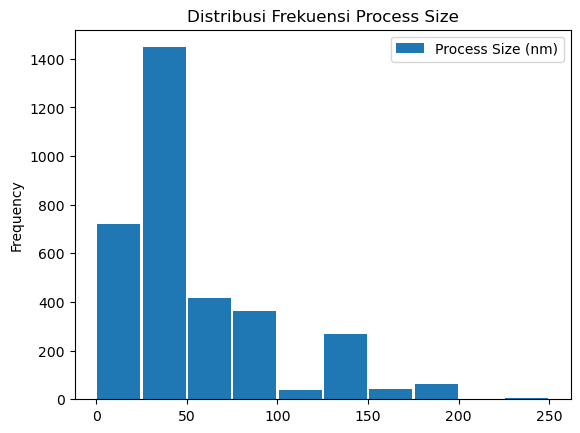

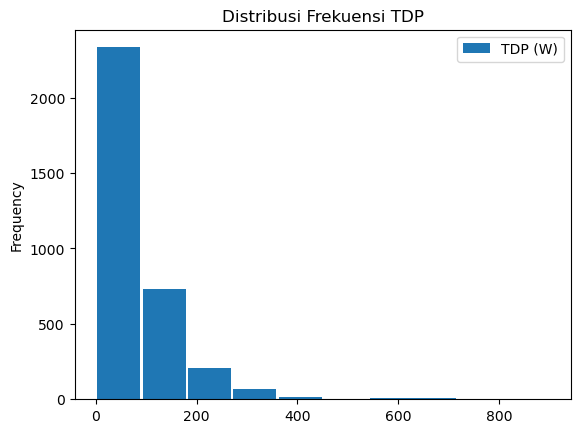

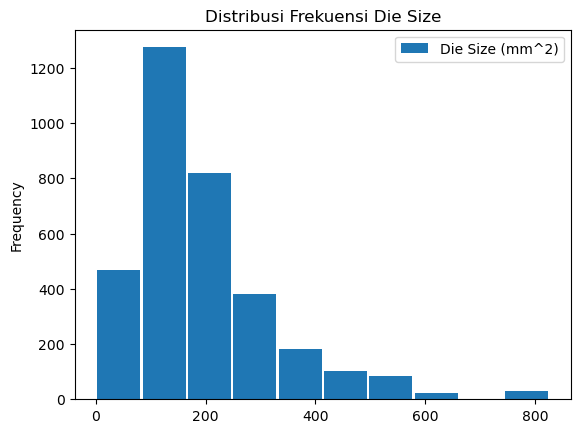

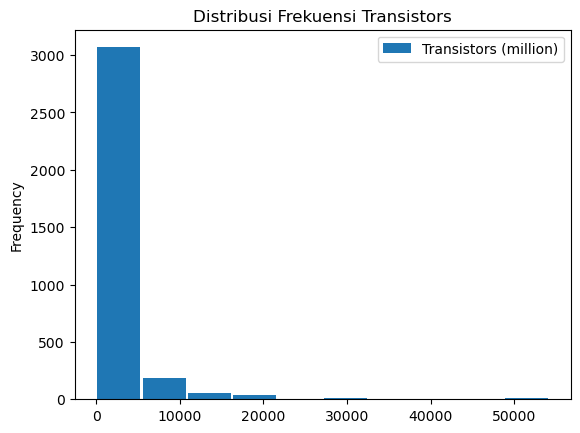

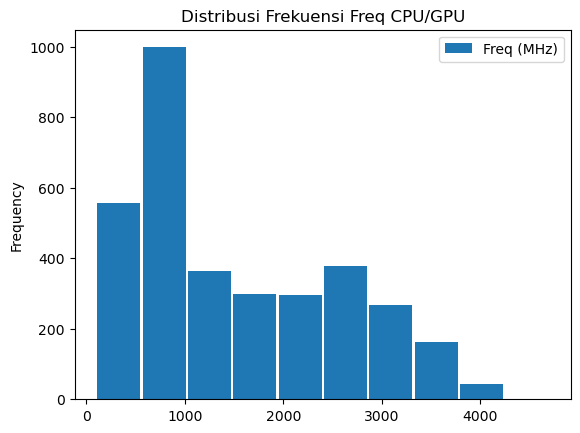

In [10]:
print("=====================================================================================================")
print("DISTRIBUSI FREKUENSI DATA KUANTITATIF DALAM BENTUK GRAFIK")
print("=====================================================================================================")

df[["Process Size (nm)"]].plot(kind="hist", bins=[0,25,50,75,100,125,150,175,200,225,250], rwidth=0.95, ylabel="Frekuensi", xlabel="Process Size (nm)", title="Distribusi Frekuensi Process Size")
df[["TDP (W)"]].plot(kind="hist", bins=[1,90.9,180.80,270.70,360.60,450.50,540.40,720.20,810.10,900], rwidth=0.95, ylabel="Frekuensi", xlabel="TDP (W)", title="Distribusi Frekuensi TDP")
df[["Die Size (mm^2)"]].plot(kind="hist", bins=[1,83.5,166,248.5,331,413.5,496,578.50,661,743.5,826], rwidth=0.95, ylabel="Frekuensi", xlabel="Die Size (mm^2)", title="Distribusi Frekuensi Die Size")
df[["Transistors (million)"]].plot(kind="hist", bins=[8,5427.20,10846.40,16265.6,21684.8,27104,32523.2,37942.4,43361.6,48780.8,54200], rwidth=0.95, ylabel="Frekuensi", xlabel="Transistors (million)", title="Distribusi Frekuensi Transistors")
df[["Freq (MHz)"]].plot(kind="hist", bins=[100,560,1020,1480,1940,2400,2860,3320,3780,4240,4700], rwidth=0.95, ylabel="Frekuensi", xlabel="Freq (MHz)", title="Distribusi Frekuensi Freq CPU/GPU")

**Informasi yang didapat**:

- Distribusi Frekuensi Process Size
Berdasarkan grafik, mayoritas product memiliki Process size berukuran 1-50 nm. Terdapat beberapa process size yang berukuran lebih dari 50 nm dikarenakan pada awal pembuatan GPU/CPU, teknologi tersebut belum berkembang sehingga untuk membuat transistor yang kecil sangatlah sulit.
- Distribusi Frekuensi TDP
Berdasarkan grafik, mayoritas TDP (Thermal Design Power) product berada pada 0-200 Watt. Beberapa TDP berada pada lebih dari 200 watt dikarenakan pada awal pembuatan CPU/GPU, TDP masih belum bisa terkontrol dan belum terdapat teknologi yang memadai untuk membuat CPU dan GPU yang lebih hemat daya.
- Distribusi Frekuensi Die Size
Berdasarkan grafik, mayoritas Die size suatu CPU/GPU dibawah 300 〖mm〗^2. Beberapa die size berada pada lebih dari 300 〖mm〗^2 disebabkan oleh pada awal pembuatan CPU/GPU, inovasi masih terpusat pada kualitas CPU/GPU dan belum mempertimbangkan ataupun belum memiliki teknologi yang dapat membuat die sizenya semakin kecil.
- Distribusi Frekuensi Transistors
Berdasarkan grafik, mayoritas banyaknya transistor dalam CPU/GPU kurang dari 5000 juta. Walaupun ukuran transistor saat ini sudah lebih kecil, banyak transistor masih berkisar disekitar 5000 juta kurang karena Vendor dan Foundry kemungkinan lebih mementingkan untuk memperkecil ukuran CPU dan GPU sehingga komputer atau laptop bisa lebih kecil, ringan, dan lebih hemat daya.
- Distribusi Frekuensi Freq CPU/GPU
Berdasarkan grafik, frekuensi CPU/GPU didominasi pada kurang dari 1000 MHz, tetapi penyebaran frekuensi CPU/GPU masih dapat dibilang merata dibandingkan data-data yang lain.

# Visualisasi

**Perbandingan Kategori**

--------------------------------------------------------------------------------

1. Perbandingan banyak CPU dan GPU

<AxesSubplot:title={'center':'Banyak CPU dan GPU'}>

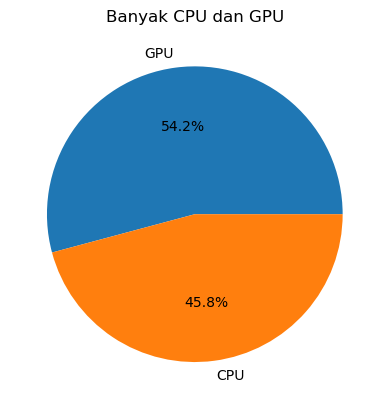

In [11]:
df["Type"].value_counts().plot(kind="pie", title="Banyak CPU dan GPU", ylabel="", autopct='%1.1f%%')

**Insight**:  Berdasarkan grafik dia atas dapat diketahui bahwa banyak GPU lebih banyak dibandingkan banyak CPU. Hal ini mengakibatkan GPU merupakan faktor yang lebih dibutuhkan dalam sector computer dibandingkan CPU.

2. Perbandingan banyak product yang dibuat suatu Foundry

<AxesSubplot:title={'center':'Banyak Product yang Dibuat suatu Foundry'}, xlabel='Banyak CPU dan GPU', ylabel='Foundry'>

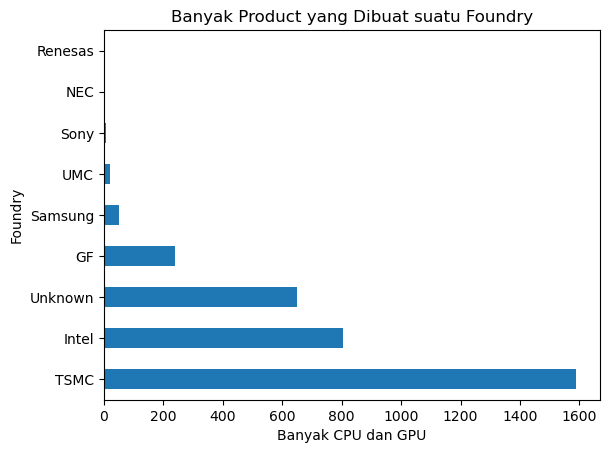

In [12]:
df["Foundry"].value_counts().plot(kind="barh", title="Banyak Product yang Dibuat suatu Foundry", ylabel="Foundry", xlabel="Banyak CPU dan GPU")

**Insight**: Berdasarkan grafik, dapat dilihat bahwa TSMC mendominasi jumlah CPU dan GPU yang dibuat dan salah satu pesaing yang berkemungkinan untuk mengalahkan dominasi tersebut adalah Intel.

3. Perbandingan banyak product yang dimiliki suatu Vendor

<AxesSubplot:title={'center':'Banyak Product yang Dimiliki Suatu Vendor'}, xlabel='Banyak CPU dan GPU', ylabel='Vendor'>

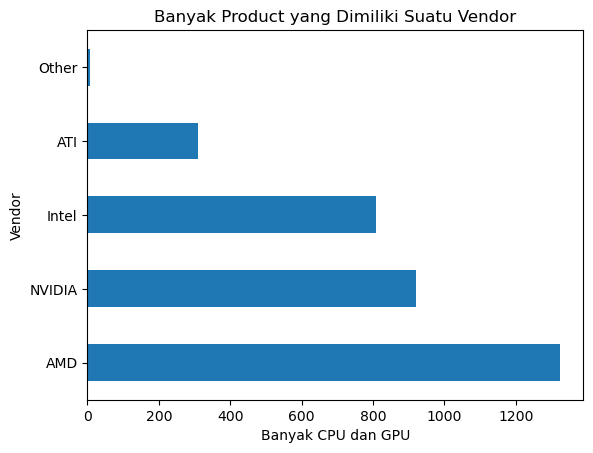

In [13]:
df["Vendor"].value_counts().plot(kind="barh", title="Banyak Product yang Dimiliki Suatu Vendor", ylabel="Vendor", xlabel="Banyak CPU dan GPU")

**Insight**: Berdasarkan grafik, terdapat 3 vendor yang mendominasi dalam pasar CPU dan GPU yaiti AMD, NVIDIA, Intel.

**Penampilan Perubahan Terhadap Waktu**

--------------------------------------------------------------------------------

1. Perubahan ukuran dan banyak transistor pada CPU

<AxesSubplot:title={'center':'Perubahan Banyak Transistor CPU dari Waktu ke Waktu'}, xlabel='Release Date'>

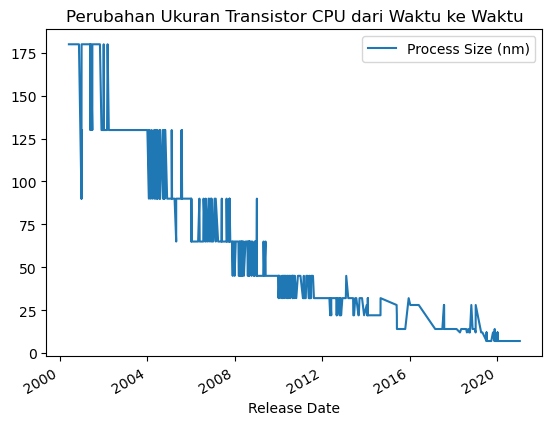

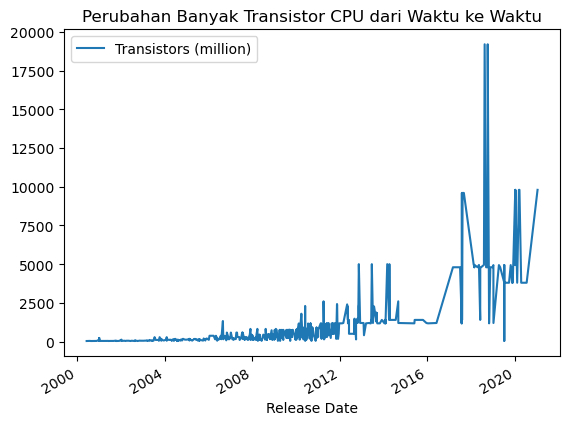

In [14]:
data_CPU = df.loc[df["Type"] == "CPU"]

data_CPU.plot(kind="line", x="Release Date", y=["Process Size (nm)"], title="Perubahan Ukuran Transistor CPU dari Waktu ke Waktu")
data_CPU.plot(kind="line", x="Release Date", y=["Transistors (million)"], title="Perubahan Banyak Transistor CPU dari Waktu ke Waktu")


2. Perubahan ukuran dan banyak transistor pada GPU

<AxesSubplot:title={'center':'Perubahan Banyak Transistor GPU dari Waktu ke Waktu'}, xlabel='Release Date'>

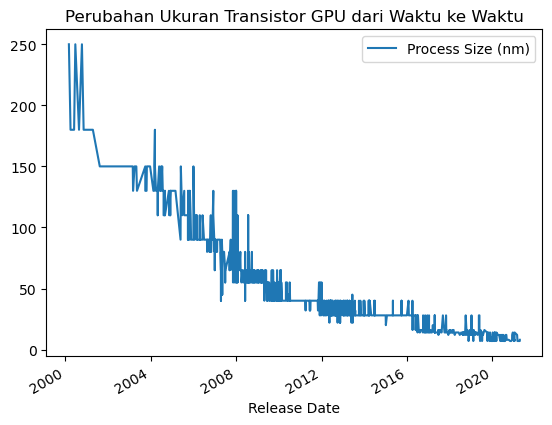

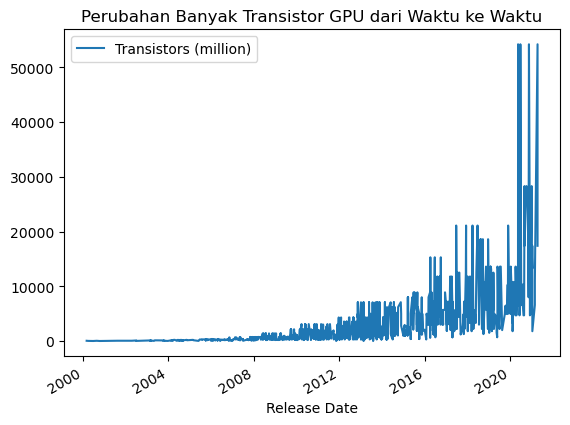

In [15]:
data_GPU = df.loc[df["Type"] == "GPU"]

data_GPU.plot(kind="line", x="Release Date", y=["Process Size (nm)"], title="Perubahan Ukuran Transistor GPU dari Waktu ke Waktu")
data_GPU.plot(kind="line", x="Release Date", y=["Transistors (million)"], title="Perubahan Banyak Transistor GPU dari Waktu ke Waktu")

**Insight**:
- Berdasarkan grafik perubahan ukuran CPU maupun GPU dapat diketahui bahwa CPU maupun GPU dari tahun ke tahun memiliki ukuran yang relatif lebih kecil dibandingkan tahun-tahun sebelumnya yang bertujuan untuk meningkatkan efisiensi dan mengurangi daya yang dibutuhkan dari CPU dan GPU tersebut. Perubahan ukuran transistor dari tahun ke tahun juga terlihat berkurang secara eksponensial dibandingkan linear.
- Berdasarkan grafik perubahan banyak transistor pada CPU maupun GPU dari tahun ke tahun dapat diketahui bahwa banyak transistor CPU maupun GPU sebagian besar relatif lebih besar dibandingkan tahun-tahun sebelumnya. Hal ini bertujuan untuk meningkatkan performa suatu komputer. Grafik perubahan banyak transistor ini juga terlihat bertambah secara eksponensial dibandingkan linear.
-Melalui kedua grafik banyak transistor dan ukuran transistor bisa diketahui bahwa semakin kecil ukuran transistor maka jumlah transistor pada suatu CPU atau GPU bisa bertambah yang berarti bahwa CPU dan GPU semakin tahun akan semakin efisien namun dengan peforma yang lebih baik.

3. Banyak macam CPU dan GPU yang diproduksi tiap tahun

<AxesSubplot:title={'center':'Banyak Macam CPU dan GPU yang Diproduksi Tiap Tahun'}, xlabel='Release Year', ylabel='Banyak'>

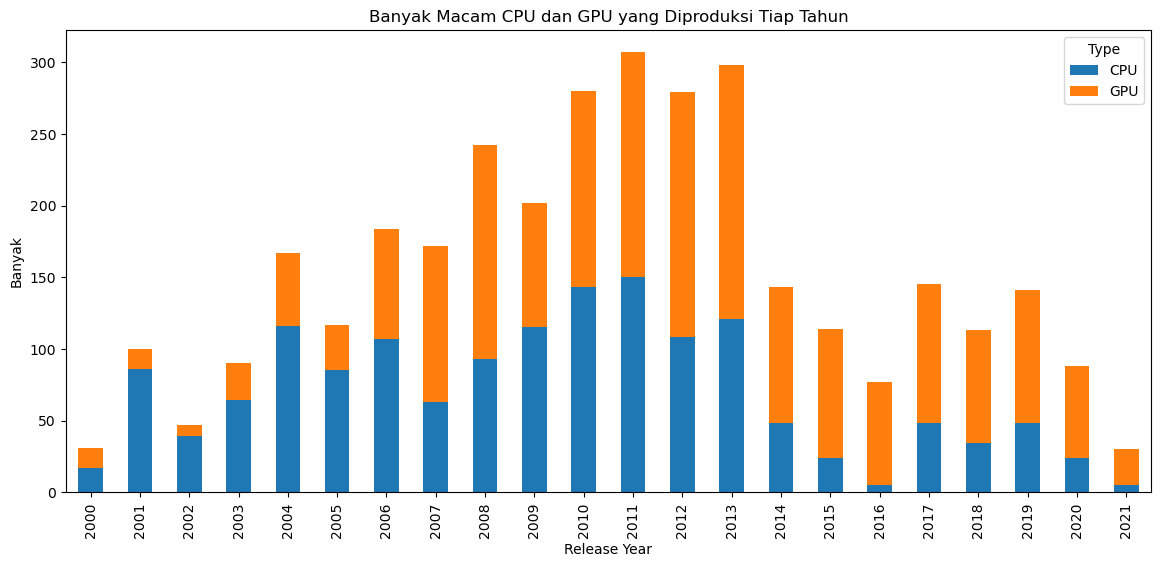

In [16]:
df_time = df
df_time["Release Date"] = df_time["Release Date"].dt.year.astype("int")
df_time.groupby("Release Date")["Type"].value_counts().unstack().plot(kind="bar",stacked=True, legend=True, figsize=(14, 6), ylabel="Banyak", title="Banyak Macam CPU dan GPU yang Diproduksi Tiap Tahun", xlabel="Release Year")


**Insight**: Pada awal tahun 2000, pembuatan CPU dan GPU tidak terlalu banyak karena belum banyak Foundry dan Vendor yang melihat potensi berkembangnya CPU dan GPU. Setelah sekitar 7 tahun, pembuatan CPU dan GPU mulai mengalami peningkatan karena lebih banyak foundry yang melihat potensi mereka dan mulai mengembangkannya. Pada tahun 2014, terdapat penurunan signifikan yang dapat dikarenakan oleh perkembangan CPU dan GPU yang semakin kompleks dan sulit sehingga tidak bisa diproduksi secepat dan sebanyak dulu. Walapun banyak CPU dan GPU pada tahun 2014 ke atas tidak banyak tetapi kegunaan mereka lebih baik sehingga bisa digunakan dimana-mana. Penurunan tersebut bisa juga terjadi karena terdapat CPU dan GPU baru yang belum terdata dalam dataset ini.

**Penampilan Hierarki dan Hubungan Keseluruhan-Bagian**

--------------------------------------------------------------------------------

1. Banyaknya data per macam product (CPU/GPU) per vendor

<AxesSubplot:title={'center':'Banyak CPU dan GPU yang Dimiliki Suatu Vendor'}, xlabel='Banyak', ylabel='Type'>

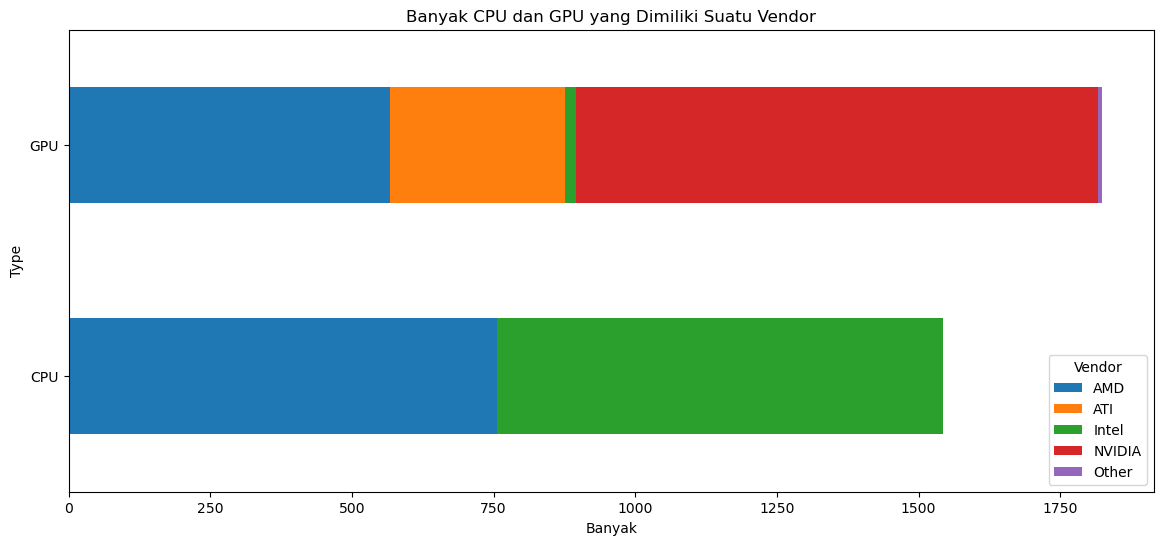

In [17]:
df.groupby("Type")["Vendor"].value_counts().unstack().plot(kind="barh",stacked=True, legend=True, figsize=(14, 6), xlabel="Banyak", title="Banyak CPU dan GPU yang Dimiliki Suatu Vendor")

**Insight**: Berdasarkan grafik, terlihat bahwa AMD dan Intel mendominasi pasar CPU, sedangkan pada pasar GPU, NVIDIA mendominasi jumlah GPU yang terbesar tetapi masih bersaing dengan AMD dan ATI.

2. Banyaknya data per vendor per foundry

<AxesSubplot:title={'center':'Banyak Product yang Dimiliki Tiap Vendor yang Diproduksi Suatu Foundry'}, xlabel='Banyak Product', ylabel='Vendor'>

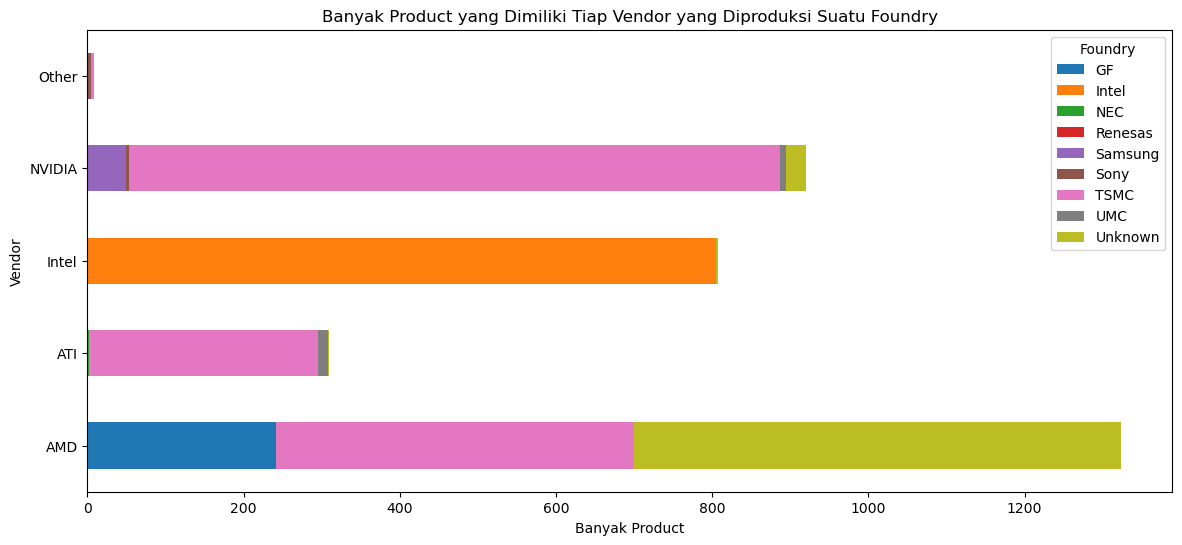

In [18]:
df.groupby("Vendor")["Foundry"].value_counts().sort_values().unstack().plot(kind="barh",stacked=True, legend=True, figsize=(14, 6), title="Banyak Product yang Dimiliki Tiap Vendor yang Diproduksi Suatu Foundry", xlabel="Banyak Product")


**Insight**: Berdasarkan grafik, TSMC mendominasi dalam produksi vendor NVIDIA, ATI, AMD, sedangkan hampir semua product Vendor intel diproduksi oleh perusahaannya sendiri yaitu Intel. Walapun TSMC mendominasi produksi AMD, produksi AMD juga memiliki beberapa foundry yang mendominasi, yaitu GF.

**Plotting Relationship**

--------------------------------------------------------------------------------

Grafik plotting relationship terdapat pada bagian korelasi

# Korelasi

**Grafik Relasi antara TDP dan Process Size**

--------------------------------------------------------------------------------

<AxesSubplot:title={'center':'Relasi antara TDP dan Process Size'}, xlabel='TDP (W)', ylabel='Process Size (nm)'>

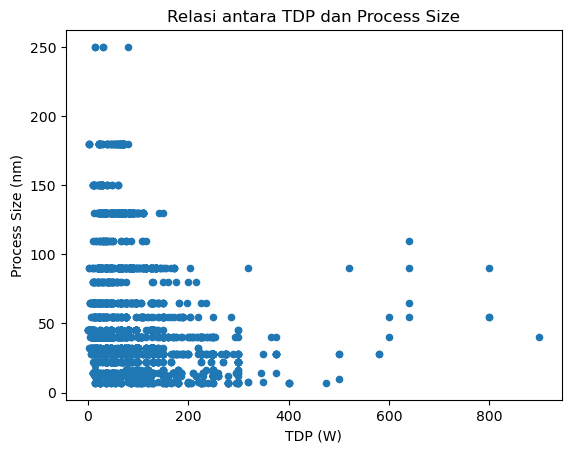

In [19]:
df.plot(kind="scatter", x="TDP (W)", y="Process Size (nm)", title="Relasi antara TDP dan Process Size")

**Grafik Relasi antara Process Size dan Die Size**

--------------------------------------------------------------------------------

<AxesSubplot:title={'center':'Relasi antara Process Size dan Die Size'}, xlabel='Die Size (mm^2)', ylabel='Process Size (nm)'>

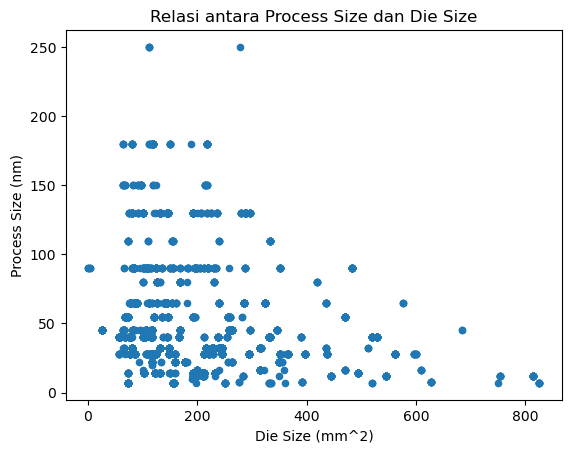

In [20]:
df.plot(kind="scatter", x="Die Size (mm^2)", y="Process Size (nm)", title="Relasi antara Process Size dan Die Size")

**Grafik Relasi antara Die Size dan TDP**

--------------------------------------------------------------------------------

<AxesSubplot:title={'center':'Relasi antara Die Size dan TDP'}, xlabel='Die Size (mm^2)', ylabel='TDP (W)'>

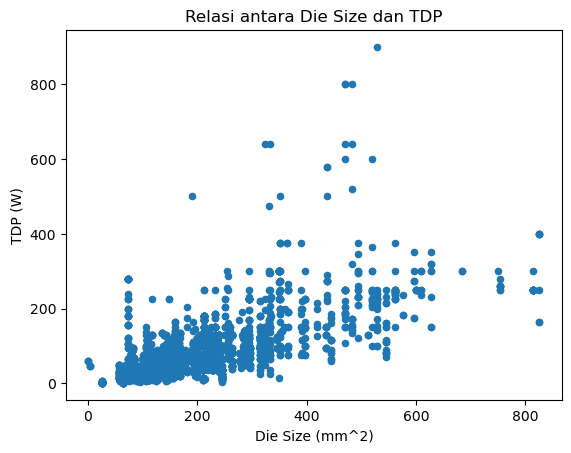

In [21]:
df.plot(kind="scatter", x="Die Size (mm^2)", y="TDP (W)", title="Relasi antara Die Size dan TDP")


**Grafik Relasi antara Process Size dan Transistor**

--------------------------------------------------------------------------------

<AxesSubplot:title={'center':'Relasi antara Process Size dan Transistor'}, xlabel='Transistors (million)', ylabel='Process Size (nm)'>

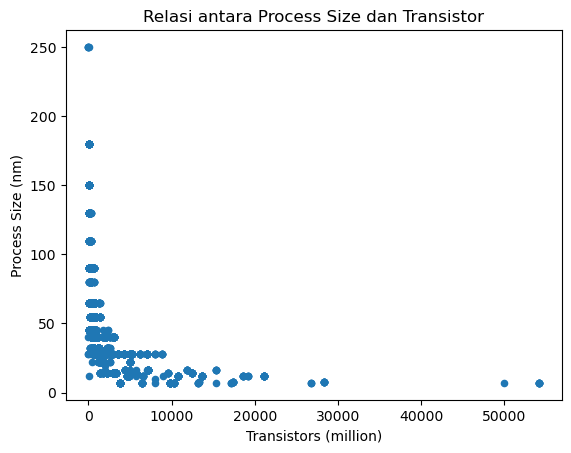

In [22]:
df.plot(kind="scatter", x="Transistors (million)", y="Process Size (nm)", title="Relasi antara Process Size dan Transistor")


**Grafik Relasi antara TDP dan Transistor**

--------------------------------------------------------------------------------

<AxesSubplot:title={'center':'Relasi antara TDP dan Transistor'}, xlabel='Transistors (million)', ylabel='TDP (W)'>

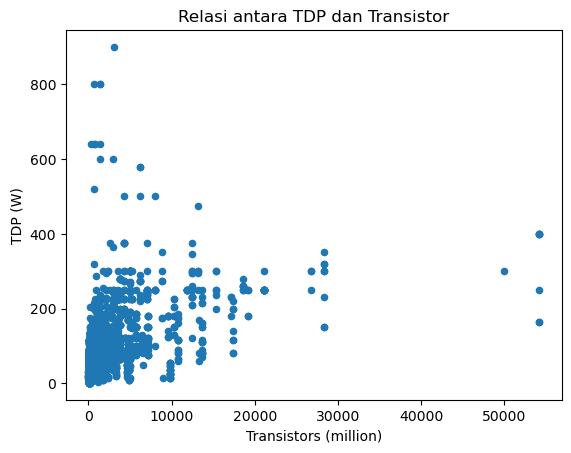

In [23]:
df.plot(kind="scatter", x="Transistors (million)", y="TDP (W)", title="Relasi antara TDP dan Transistor")


**Grafik Relasi antara Die Size dan Transistor**

--------------------------------------------------------------------------------

<AxesSubplot:title={'center':'Relasi antara Die Size dan Transistor'}, xlabel='Transistors (million)', ylabel='Die Size (mm^2)'>

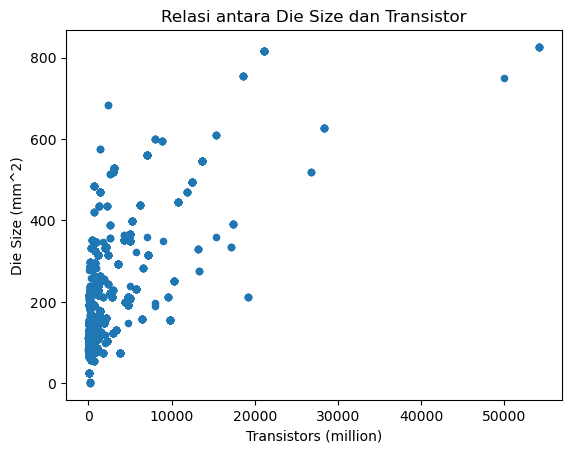

In [24]:
df.plot(kind="scatter", x="Transistors (million)", y="Die Size (mm^2)", title="Relasi antara Die Size dan Transistor")


**Grafik Relasi antara Freq dan Process Size**

--------------------------------------------------------------------------------

<AxesSubplot:title={'center':'Relasi antara Freq dan Process Size'}, xlabel='Freq (MHz)', ylabel='Process Size (nm)'>

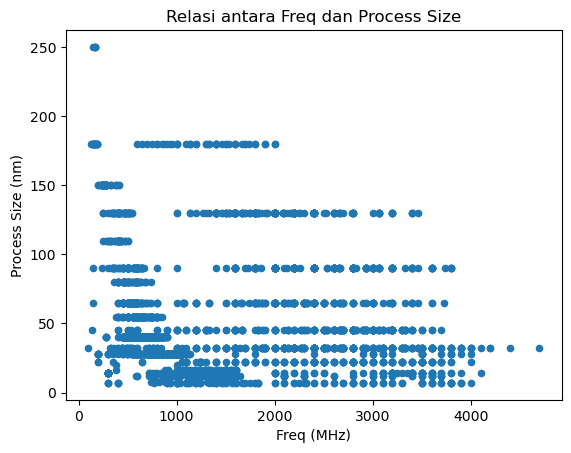

In [25]:
df.plot(kind="scatter", x="Freq (MHz)", y="Process Size (nm)", title="Relasi antara Freq dan Process Size")


**Grafik Relasi antara TDP dan Freq**

--------------------------------------------------------------------------------

<AxesSubplot:title={'center':'Relasi antara TDP dan Freq'}, xlabel='Freq (MHz)', ylabel='TDP (W)'>

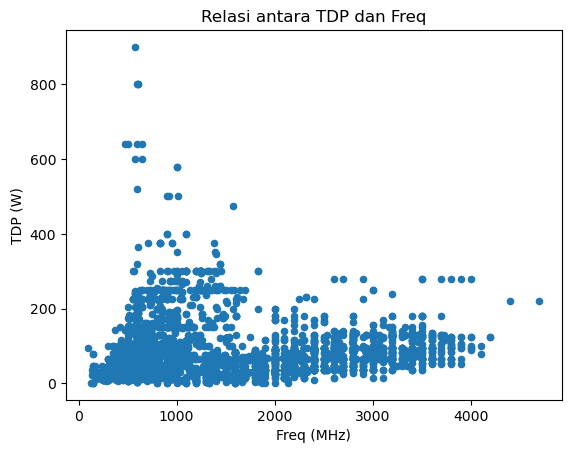

In [26]:
df.plot(kind="scatter", x="Freq (MHz)", y="TDP (W)", title="Relasi antara TDP dan Freq")


**Grafik Relasi antara Die Size dan Freq**

--------------------------------------------------------------------------------

<AxesSubplot:title={'center':'Relasi antara Die Size dan Freq'}, xlabel='Freq (MHz)', ylabel='Die Size (mm^2)'>

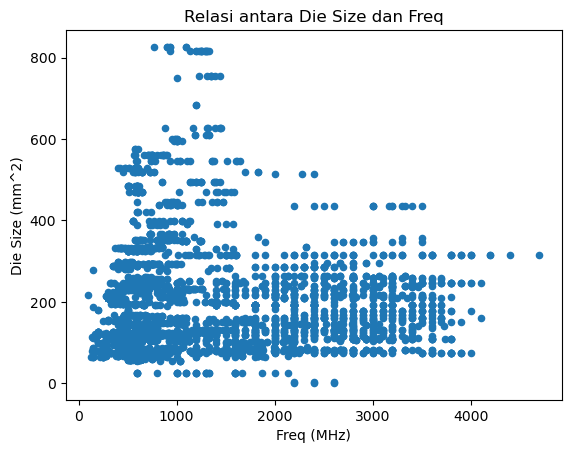

In [27]:
df.plot(kind="scatter", x="Freq (MHz)", y="Die Size (mm^2)", title="Relasi antara Die Size dan Freq")


**Grafik Relasi antara Transistor dan Freq**

--------------------------------------------------------------------------------

<AxesSubplot:title={'center':'Relasi antara Transistor dan Freq'}, xlabel='Freq (MHz)', ylabel='Transistors (million)'>

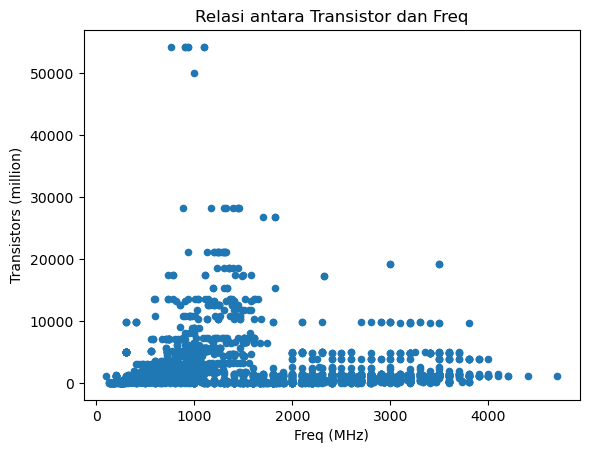

In [28]:
df.plot(kind="scatter", x="Freq (MHz)", y="Transistors (million)", title="Relasi antara Transistor dan Freq")


**Tabel nilai korelasi antar atribut kuantitatif**

--------------------------------------------------------------------------------

In [29]:
print("TABEL NILAI KORELASI ANTARA ATRIBUT DATA KUANITATIF")
df.loc[:, ["Process Size (nm)", "TDP (W)", "Die Size (mm^2)", "Transistors (million)", "Freq (MHz)"]].corr()

TABEL NILAI KORELASI ANTARA ATRIBUT DATA KUANITATIF


,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz)
Process Size (nm),1.000000,-0.188304,-0.216549,-0.399029,-0.087674
TDP (W),-0.188304,1.000000,0.674670,0.465138,0.066627
Die Size (mm^2),-0.216549,0.674670,1.000000,0.634836,-0.054683
Transistors (million),-0.399029,0.465138,0.634836,1.000000,-0.044620
Freq (MHz),-0.087674,0.066627,-0.054683,-0.044620,1.000000


**Penjelasan nilai korelasi**

-------------------------------------------------------------------------------

Berdasarkan tabel nilai korelasi dan grafik plotting relationship diatas, kami dapat menyimpulkan korelasi antara data-data kuantitatif sebagai berikut: 
- Process Size dan TDP tidak mempunyai korelasi apapun karena nilai korelasinya yang mendekati nilai 0 serta grafik plotnya yang berantakan dan tidak menunjukkan kecenderungan membuat suatu garis linear sama sekali.
- Process Size dan Die Size tidak mempunyai korelasi apapun karena nilai korelasinya yang mendekati nilai 0 serta grafik plotnya yang berantakan dan tidak menunjukkan kecenderungan membuat suatu garis linear sama sekali.
- TDP dan Die Size mempunyai korelasi positif yang cukup kuat dengan nilai korelasi 0.67. Jika dilihat dari grafik plotnya juga terlihat kecenderungan membentuk suatu garis linear naik walaupun masih sedikit berantakan. Karena TDP dan Die Size berkorelasi positif maka bisa dikatakan ketika nilai TDP naik maka nilai Die Size juga akan naik begitu pula sebaliknya.
- Process Size dan Transistors mempunyai nilai korelasi diantara -0.25 hingga -0.5 jadi bisa dikatakan bahwa Process Size dan Transistors mempunyai korelasi negatif yang lemah. Karena korelasinya lemah korelasi ini tidak bisa dipercaya 100% dan bisa saja korelasi yang terbentuk antara kedua data tersebut hanyalah sebuah kebetulan. Jika dilihat dari grafik plotnya, korelasi kedua data ini lebih cenderung membuat suatu garis eksponensial turun dibandingkan membuat suatu garus linear turun.
- TDP dan Transistors mempunyai nilai korelasi diantara 0.25 hingga 0.5 jadi bisa dikatakan bahwa TDP dan Transistors mempunyai korelasi positif yang lemah. Karena korelasinya lemah korelasi ini tidak bisa dipercaya 100% dan bisa saja korelasi yang terbentuk antara kedua data tersebut hanyalah sebuah kebetulan. Jika dilihat dari grafik plotnya terlihat sedikit sekali kecenderungan membuat suatu garis linear naik.
- Die Size dan Transistors mempunyai korelasi positif yang cukup kuat dengan nilai korelasi 0.63. Jika dilihat dari grafik plotnya juga terlihat kecenderungan membentuk suatu garis linear naik walaupun masih sedikit berantakan. Karena Die Size dan Transistor berkorelasi positif maka bisa dikatakan ketika nilai Die Size naik maka nilai Transistor juga akan naik begitu pula sebaliknya.
- Process Size dan Freq tidak mempunyai korelasi apapun karena nilai korelasinya yang sangat mendekati nilai 0 serta grafik plotnya yang tidak menunjukkan kecenderungan membuat suatu garis linear sama sekali.
- TDP dan Freq tidak mempunyai korelasi apapun karena nilai korelasinya yang sangat mendekati nilai 0 serta grafik plotnya yang tidak menunjukkan kecenderungan membuat suatu garis linear sama sekali. Penumpukan titik di bagian bawah grafik plot juga menunjukan bahwa korelasi antara kedua data tersebut sangatlah lemah atau bahkan tidak berkorelasi sama sekali.
- Die Size dan Freq tidak mempunyai korelasi apapun karena nilai korelasinya yang sangat mendekati nilai 0 serta grafik plotnya yang tidak menunjukkan kecenderungan membuat suatu garis linear sama sekali. Penumpukan titik di bagian bawah grafik plot juga menunjukan bahwa korelasi antara kedua data tersebut sangatlah lemah atau bahkan tidak berkorelasi sama sekali.
- Transistor dan Freq tidak mempunyai korelasi apapun karena nilai korelasinya yang sangat mendekati nilai 0 serta grafik plotnya yang tidak menunjukkan kecenderungan membuat suatu garis linear sama sekali. Penumpukan titik di bagian bawah grafik plot juga menunjukan bahwa korelasi antara kedua data tersebut sangatlah lemah atau bahkan tidak berkorelasi sama sekali.